In [1]:
import pandas as pd
import numpy as np

# Load and Cleaning

In [2]:
# load data
data = pd.read_excel('Canada.xlsx', sheet_name='Canada by Citizenship', skiprows=20, skipfooter=2)
data

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,56,91,77,71,64,60,102,69,46,59


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      195 non-null    object
 1   Coverage  195 non-null    object
 2   OdName    195 non-null    object
 3   AREA      195 non-null    int64 
 4   AreaName  195 non-null    object
 5   REG       195 non-null    int64 
 6   RegName   195 non-null    object
 7   DEV       195 non-null    int64 
 8   DevName   195 non-null    object
 9   1980      195 non-null    int64 
 10  1981      195 non-null    int64 
 11  1982      195 non-null    int64 
 12  1983      195 non-null    int64 
 13  1984      195 non-null    int64 
 14  1985      195 non-null    int64 
 15  1986      195 non-null    int64 
 16  1987      195 non-null    int64 
 17  1988      195 non-null    int64 
 18  1989      195 non-null    int64 
 19  1990      195 non-null    int64 
 20  1991      195 non-null    int64 
 21  1992      195 no

In [4]:
data.isna().sum().sum()

0

In [5]:
data.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 38 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   OdName    195 non-null    object
 1   AreaName  195 non-null    object
 2   RegName   195 non-null    object
 3   DevName   195 non-null    object
 4   1980      195 non-null    int64 
 5   1981      195 non-null    int64 
 6   1982      195 non-null    int64 
 7   1983      195 non-null    int64 
 8   1984      195 non-null    int64 
 9   1985      195 non-null    int64 
 10  1986      195 non-null    int64 
 11  1987      195 non-null    int64 
 12  1988      195 non-null    int64 
 13  1989      195 non-null    int64 
 14  1990      195 non-null    int64 
 15  1991      195 non-null    int64 
 16  1992      195 non-null    int64 
 17  1993      195 non-null    int64 
 18  1994      195 non-null    int64 
 19  1995      195 non-null    int64 
 20  1996      195 non-null    int64 
 21  1997      195 no

In [7]:
# rename columns
data.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
data

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
192,Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,...,124,161,140,122,133,128,211,160,174,217
193,Zambia,Africa,Eastern Africa,Developing regions,11,17,11,7,16,9,...,56,91,77,71,64,60,102,69,46,59


In [8]:
# set index
data.set_index('Country', inplace=True)
data

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,2741,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,7,...,124,161,140,122,133,128,211,160,174,217


# Exploratory Data Analysis

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
data.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


## Apakah gempa 2010 Haiti mempengaruhi jumlah imigrasi dari haiti ke kanada

In [11]:
# buat variable tahun untuk mempermudah plotting
tahun = list(range(1980, 2014))

# buat series haiti
s_haiti = data.loc['Haiti', tahun]
s_haiti.index = s_haiti.index.astype(int)
s_haiti.head()

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
Name: Haiti, dtype: object

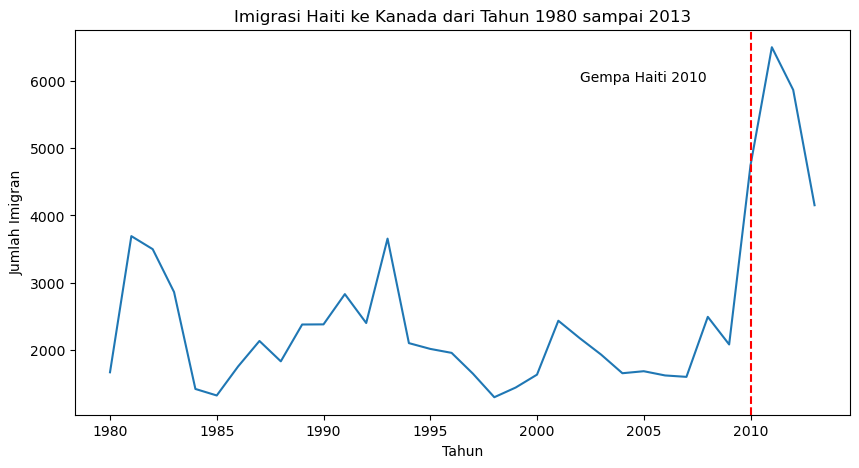

In [12]:
# plot
plt.figure(figsize=(10, 5), facecolor='w')
ax = s_haiti.plot(kind = 'line')
ax.set_facecolor('w')
plt.title('Imigrasi Haiti ke Kanada dari Tahun 1980 sampai 2013')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Imigran')
plt.axvline(x=2010, color='red', linestyle='--')

# annotate gempa 2010
plt.text(2002, 6000, 'Gempa Haiti 2010', color='k')
plt.show()

setelah terjadi gempa di haiti,terdapat kenaikan jumlah imigran yang cukup signifikan

## Perbandingan Jumlah Imigran dari India dan China

In [13]:
china_india = data.loc[['China', 'India'], tahun].T
china_india.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


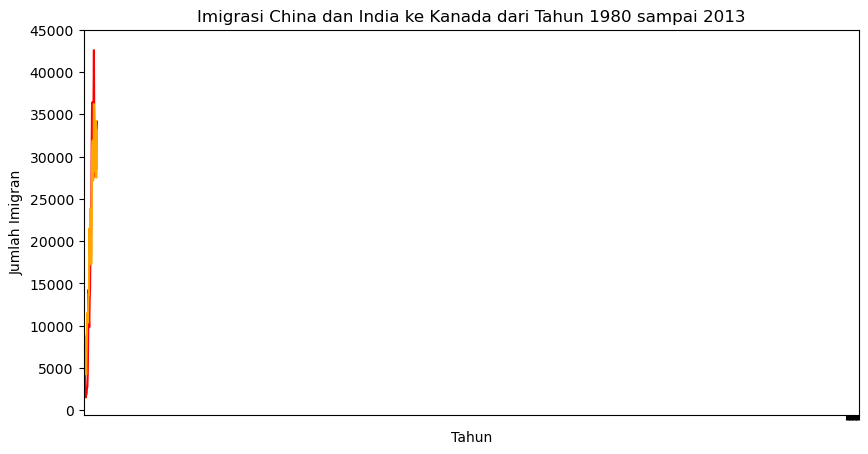

In [14]:
# plot china dengan warna merah dan india dengan warna orange
plt.figure(figsize=(10, 5), facecolor='w')
china_india['China'].plot(kind='line', color='red', label='China')
china_india['India'].plot(kind='line', color='orange', label='India')
plt.title('Imigrasi China dan India ke Kanada dari Tahun 1980 sampai 2013')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Imigran')
plt.yticks(np.arange(0, 50000, 5000))
plt.xticks(np.arange(1980, 2014, 2))
plt.show()


Text(0.5, 1.0, 'India')

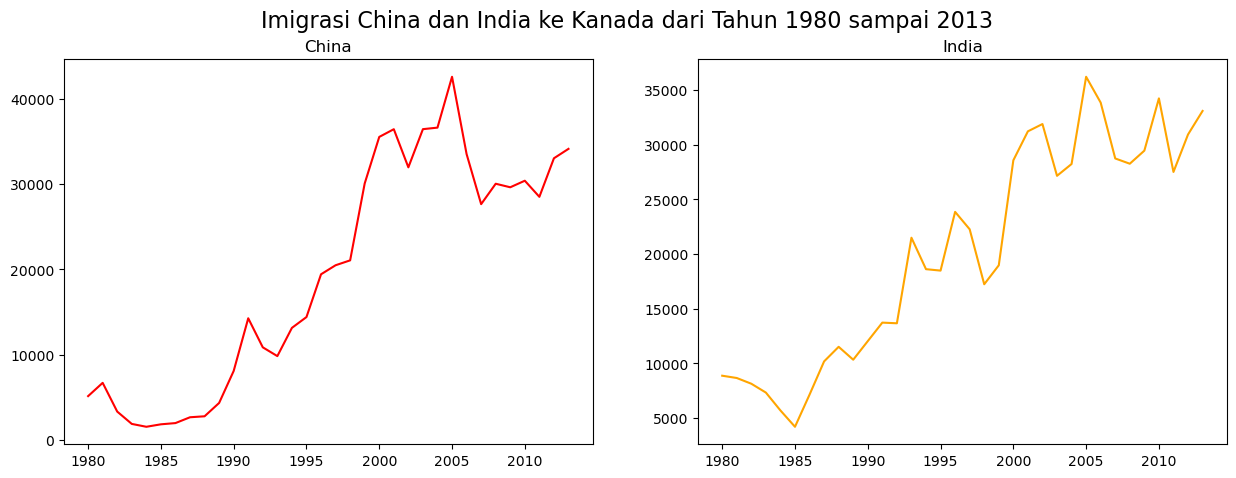

In [15]:
# subplot
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(15, 5))
# judul figure
fig.suptitle('Imigrasi China dan India ke Kanada dari Tahun 1980 sampai 2013', fontsize=16)

ax[0] = china_india['China'].plot(kind='line', color='red', label='China', ax=ax[0])
ax[0].set_title('China')

ax[1] = china_india['India'].plot(kind='line', color='orange', label='India', ax=ax[1])
ax[1].set_title('India')


Imigrasi dari India dan China ke Kanada memiliki trend yang serupa

## Trend 5 Negara dengan Imigrasi Tertinggi ke Kanada

In [16]:
# negara dengan jumlah imigrasi tertinggi

# jumlah imigrasi
total_imigrasi = data[tahun].sum(axis=1)

# buat kolom total imigrasi
data['Total'] = total_imigrasi

# melihat 5 negara dengan total tertinggi
top_5 = data.sort_values(by='Total', ascending= False).head(5)
top_5

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


### Line plot

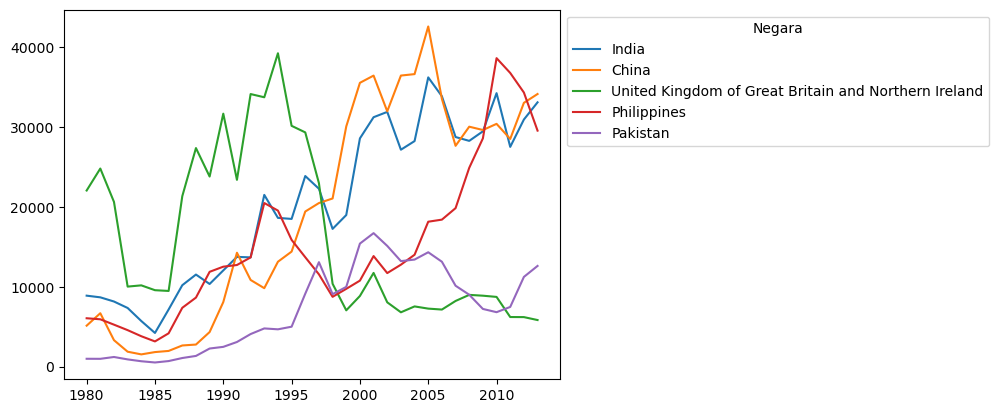

In [17]:
top_5 = top_5[tahun].T
top_5.plot()
plt.legend(title='Negara', bbox_to_anchor=(1, 1))

### Area Plot

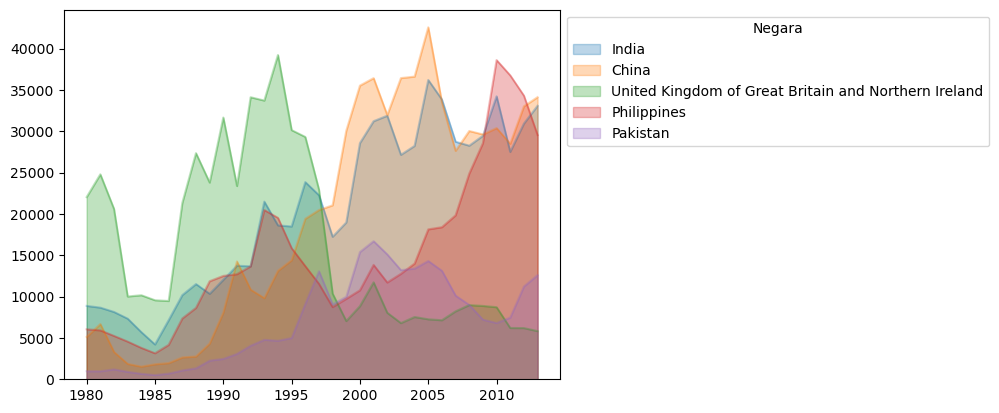

In [18]:
plt.figsize=(20, 10)
top_5.plot(kind='area',
           stacked = False,
           alpha=0.3)
plt.legend(title='Negara', bbox_to_anchor=(1, 1))
plt.show()

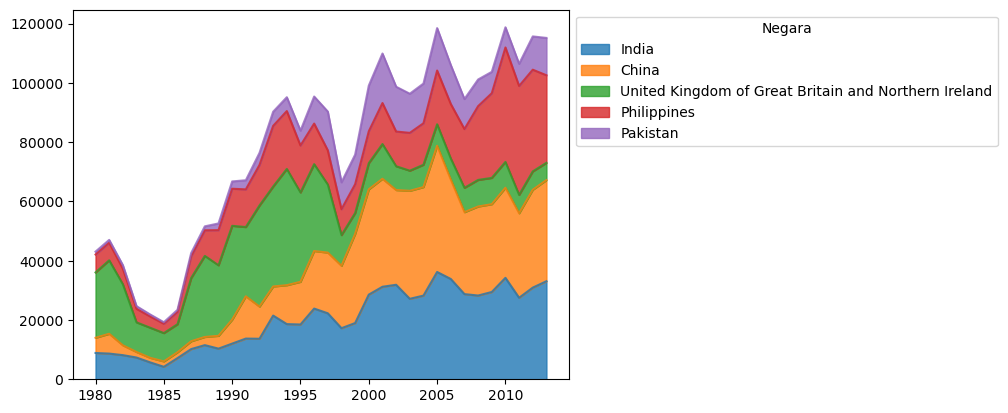

In [19]:
plt.figsize=(20, 10)
top_5.plot(kind='area',
           stacked = True,
           alpha=0.8)
plt.legend(title='Negara', bbox_to_anchor=(1, 1))
plt.show()

## Visualisasi Krisis keuangan Islandia 2008-2011 dari jumlah imigran Iceland ke Canada (Bar Plot)

In [20]:
# ambil data iceland
iceland = data.loc['Iceland', tahun]
iceland.index = iceland.index.astype(int)
iceland.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

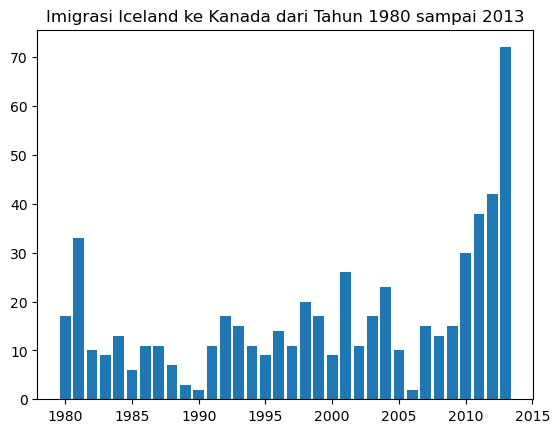

In [21]:
# matplotlib
plt.bar(iceland.index, height=iceland.values)
plt.title('Imigrasi Iceland ke Kanada dari Tahun 1980 sampai 2013')
plt.show()

<Axes: >

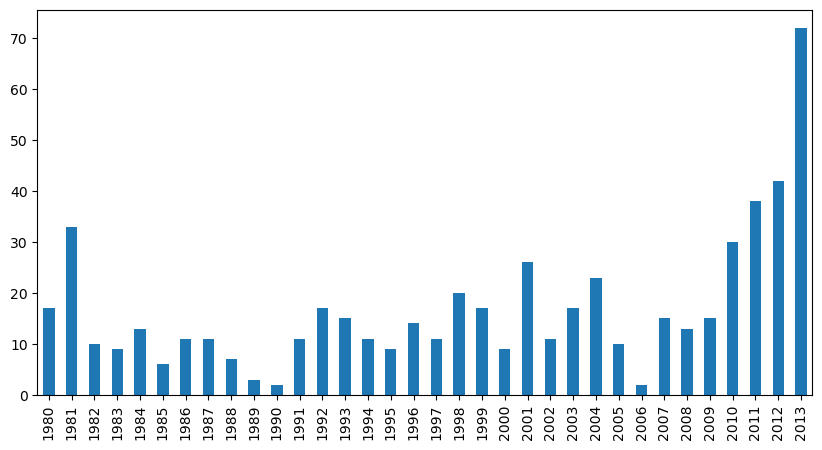

In [22]:
# pandas
iceland.plot(kind='bar', figsize=(10, 5))

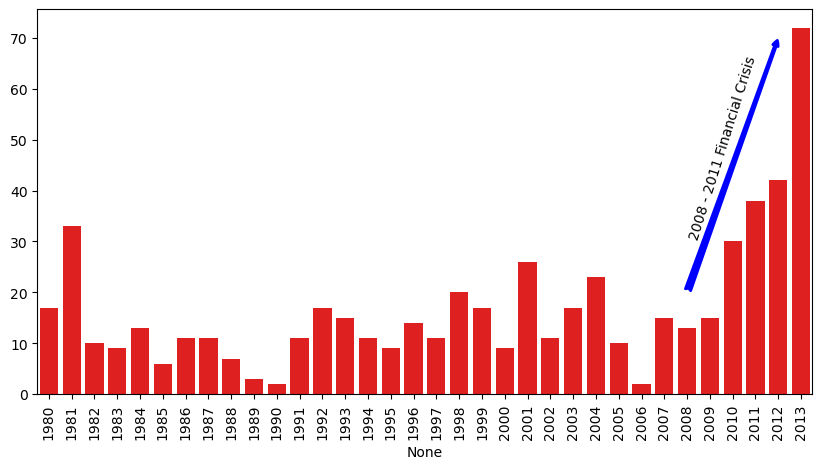

In [23]:
# seaborn
plt.figure(figsize=(10, 5))
sns.barplot(x = iceland.index, y = iceland.values, color='red')

# arrow
plt.annotate('',xy=(32, 70), #ujung awal panah
             xytext=(28, 20), #ujung akhir panah
             xycoords='data',
             arrowprops=dict(arrowstyle='fancy',connectionstyle='arc3',color='blue',lw=2))

# text
plt.annotate('2008 - 2011 Financial Crisis',
             xy=(28, 30),
             rotation=72.5,
             va='bottom', # vertical alignment
             ha= 'left') # horizontal alignment

plt.xticks(rotation=90)
plt.show()

## jumlah imigran ke Canada dari top 15 countries, selama periode 1980 - 2013

In [24]:
top_15 = data.sort_values(by='Total', ascending=True).tail(15)
top_15 = top_15['Total']
top_15

Country
Romania                                                  93585
Viet Nam                                                 97146
Jamaica                                                 106431
France                                                  109091
Lebanon                                                 115359
Poland                                                  139241
Republic of Korea                                       142581
Sri Lanka                                               148358
Iran (Islamic Republic of)                              175923
United States of America                                241122
Pakistan                                                241600
Philippines                                             511391
United Kingdom of Great Britain and Northern Ireland    551500
China                                                   659962
India                                                   691904
Name: Total, dtype: int64

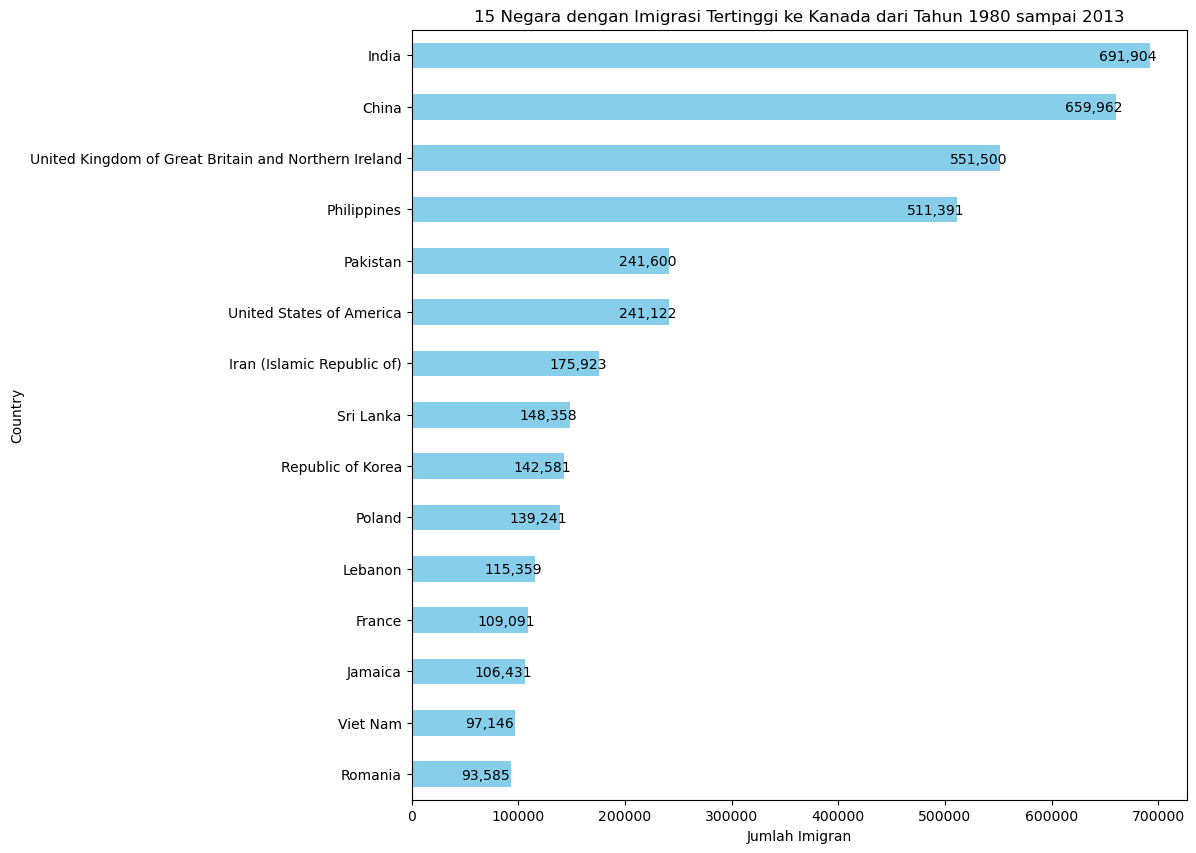

In [25]:
top_15.plot(kind='barh', figsize=(10, 10), color='skyblue')
plt.title('15 Negara dengan Imigrasi Tertinggi ke Kanada dari Tahun 1980 sampai 2013')
plt.xlabel('Jumlah Imigran')

for index, value in enumerate(top_15):    
    label = format(int(value), ',') 
    # format int with commas    
    # posisikan text di akhir bar    
    # kurangi 47000 dari x, dan 0.1 dari y    
    # untuk memastikan text di dalam bar    
    plt.annotate(label,xy=(value - 47000, index - 0.10),color='k')
plt.show()

## Pie Chart

## proporsi (persentase) imigran baru yang dikelompokkan berdasarkan benua untuk seluruh periode waktu dari 1980 hingga 2013

In [26]:
# groupby
continent_total = data.groupby('Continent')[['Total']].sum()
continent_total

,Total
Continent,
Africa,618948
Asia,3317794
Europe,1410947
Latin America and the Caribbean,765148
Northern America,241142
Oceania,55174


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


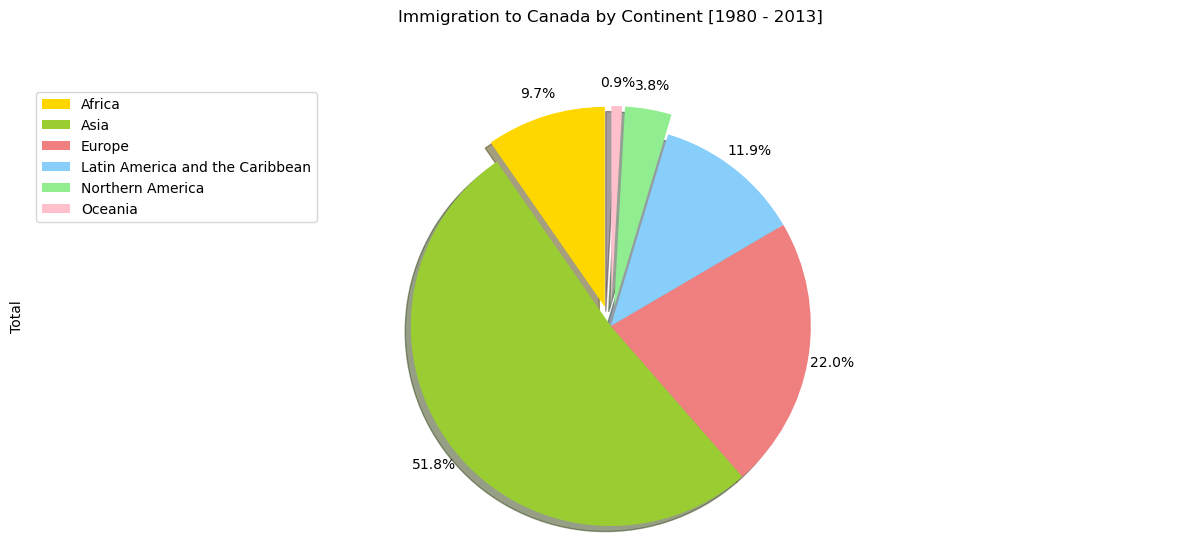

In [27]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1]

continent_total.plot(kind='pie', 
                     subplots=True, 
                     figsize=(15, 6), 
                     autopct='%1.1f%%', 
                     startangle=90,
                     shadow=True,
                     colors=colors_list,
                     explode=explode_list,
                     pctdistance=1.12,
                     labels = None)
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12)
plt.legend(labels = continent_total.index, 
           loc= 'upper left')
plt.axis('equal')
plt.show()

imigran paling banyak dari Asia (> 50%)

## Boxplot untuk jumlah imigran dari Jepang antara 1980 - 2013.

In [28]:
japan = data.loc[['Japan', 'Indonesia'], tahun].T
japan

Country,Japan,Indonesia
1980,701,186
1981,756,178
1982,598,252
1983,309,115
1984,246,123
1985,198,100
1986,248,127
1987,422,213
1988,324,270
1989,494,260


In [29]:
japan.describe()

Country,Japan,Indonesia
count,34.000000,34.000000
mean,814.911765,386.764706
std,337.219771,251.233449
min,198.000000,100.000000
25%,529.000000,207.000000
50%,902.000000,266.000000
75%,1079.000000,545.250000
max,1284.000000,1138.000000


<Axes: >

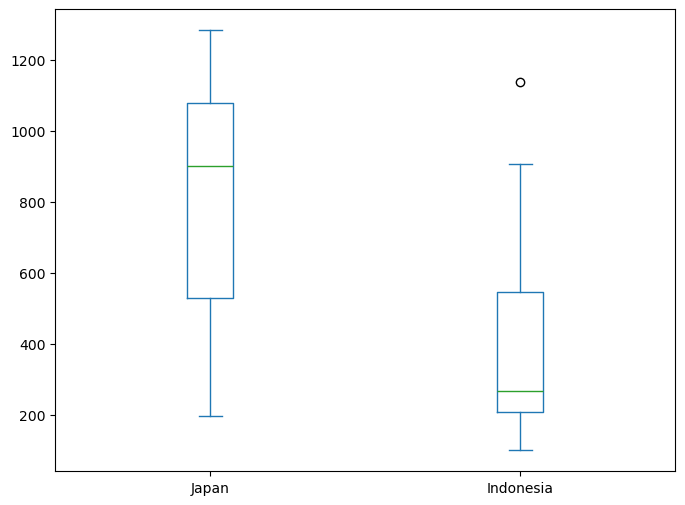

In [30]:
japan.plot(kind='box', figsize=(8, 6))

## Gunakan scatter plot, untuk visualisasi tren imigran total ke Kanada (semua negara digabungkan) selama periode 1980 - 2013.


In [31]:
df_tot = pd.DataFrame(data[tahun].sum(axis=0), columns=['Total'])
df_tot.reset_index(inplace=True)
df_tot.rename(columns={'index':'Tahun'}, inplace=True)
df_tot.head()

,Tahun,Total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


<Axes: xlabel='Tahun', ylabel='Total'>

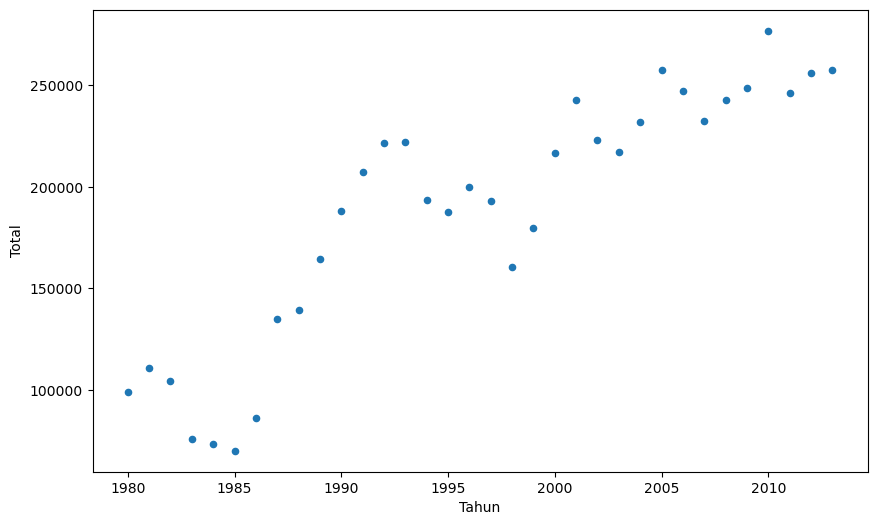

In [32]:
df_tot.plot(kind='scatter', x = 'Tahun' , y = 'Total', figsize=(10, 6))

## Melihat distribusi dengan Histogram

## Bagaimana distribusi frekuensi jumlah (populasi) imigran baru dari berbagai negara ke Kanada pada tahun 2013?

In [33]:
data_2013 = data[2013]
data_2013.head()

Country
Afghanistan       2004
Albania            603
Algeria           4331
American Samoa       0
Andorra              1
Name: 2013, dtype: int64

<Axes: ylabel='Frequency'>

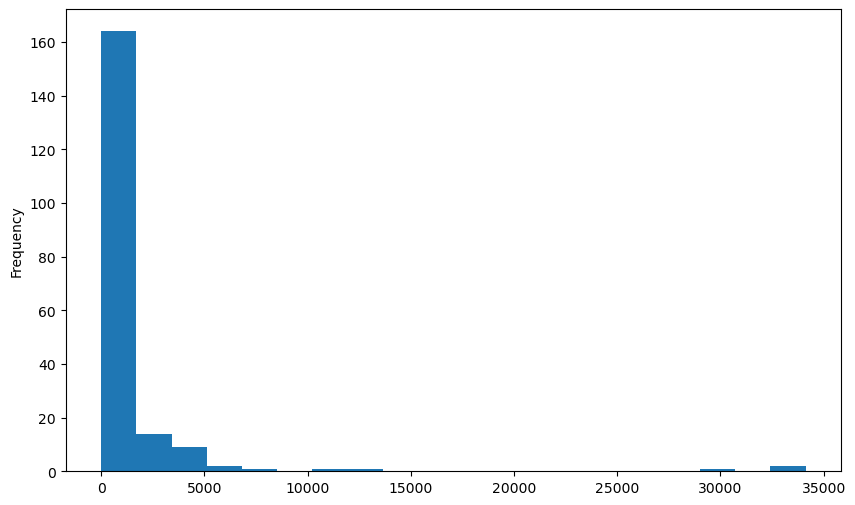

In [34]:
data_2013.plot(kind= 'hist', figsize=(10, 6),
               bins = 20)

<Axes: xlabel='2013', ylabel='Density'>

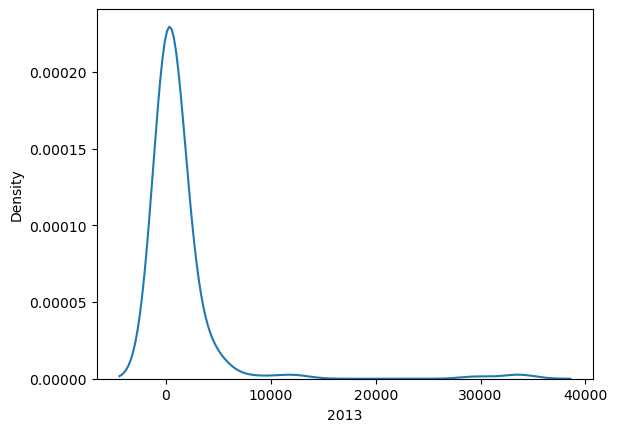

In [35]:
sns.kdeplot(data_2013)

## Bagaimana distribusi imigrasi dari Denmark, Norwegia, dan Swedia untuk tahun 1980 - 2013?

In [36]:
dns = data.loc[['Denmark', 'Norway', 'Sweden'], tahun].T
dns

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128
1985,73,54,158
1986,93,56,187
1987,109,80,198
1988,129,73,171
1989,129,76,182


Text(0, 0.5, 'Frekuensi')

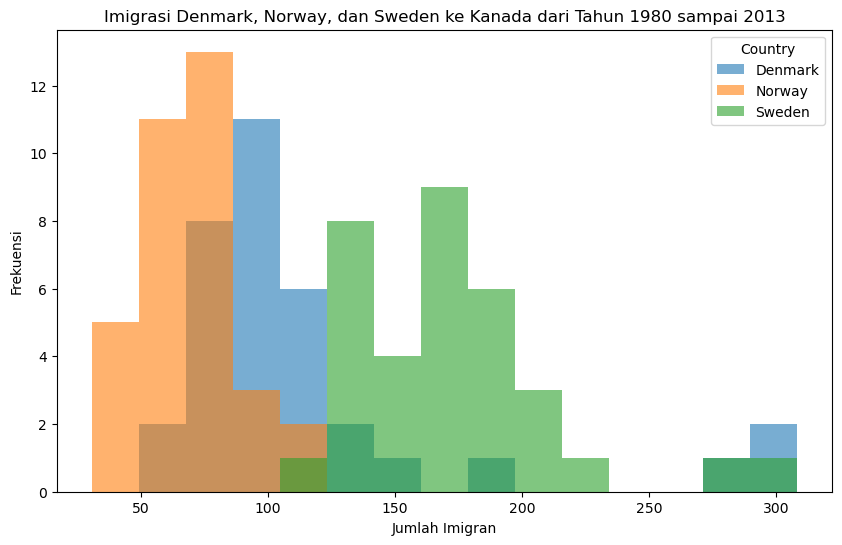

In [37]:

dns.plot(kind='hist', figsize=(10, 6), alpha=0.6, bins = 15)
plt.title('Imigrasi Denmark, Norway, dan Sweden ke Kanada dari Tahun 1980 sampai 2013')
plt.xlabel('Jumlah Imigran')
plt.ylabel('Frekuensi')

___

## melihat data imigrasi Indonesia ke Kanada selama periode 1980 - 2013

In [56]:
data.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [59]:
indonesia_s = data.loc['Indonesia', tahun]
indonesia_s.head()

1980    186
1981    178
1982    252
1983    115
1984    123
Name: Indonesia, dtype: object

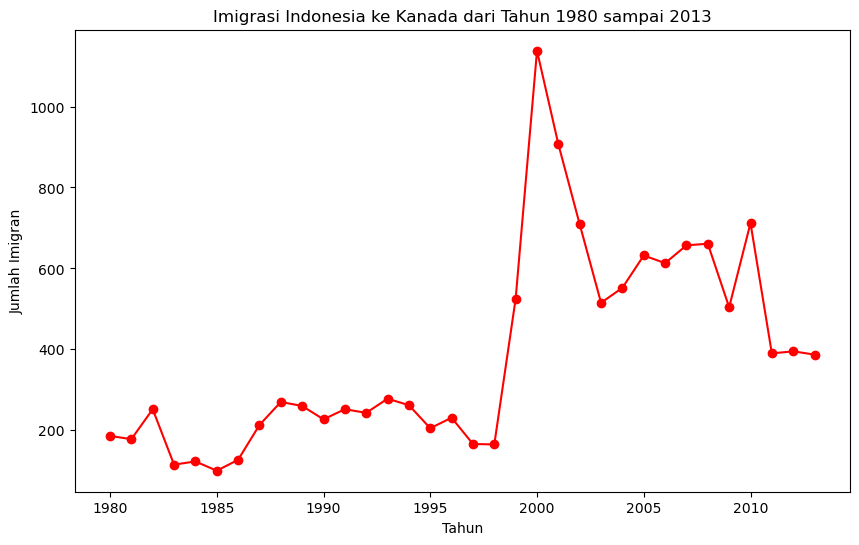

In [68]:
indonesia_s.plot(figsize=(10, 6), color='red', marker = 'o')
plt.title('Imigrasi Indonesia ke Kanada dari Tahun 1980 sampai 2013')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Imigran')
plt.show()

# Wordcloud
___

In [77]:
from wordcloud import WordCloud

In [74]:
total_immigration = total_imigrasi.sum()

In [70]:
data.index.values

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'China, Hong Kong Special Administrative Region',
       'China, Macao Special Administrative Region', 'Colombia',
       'Comoros', 'Congo', 'Costa Rica', "Côte d'Ivoire", 'Croatia',
       'Cuba', 'Cyprus', 'Czech Republic',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 

In [76]:
import re

max_words = 10000
word_string = ''
for country in data.index.values:
  country_cleaned = re.sub(r'[^a-zA-Z0-9\s]', '', country)
  country_cleaned = ''.join(word.capitalize() for word in country_cleaned.split())
  country_count = data.loc[country, 'Total']
  # print(country_cleaned, country_count)

  repeat_num_times = int(country_count / total_immigration * max_words )
  word_string = word_string + ((country_cleaned + ' ') * repeat_num_times)


word_string

'Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afg

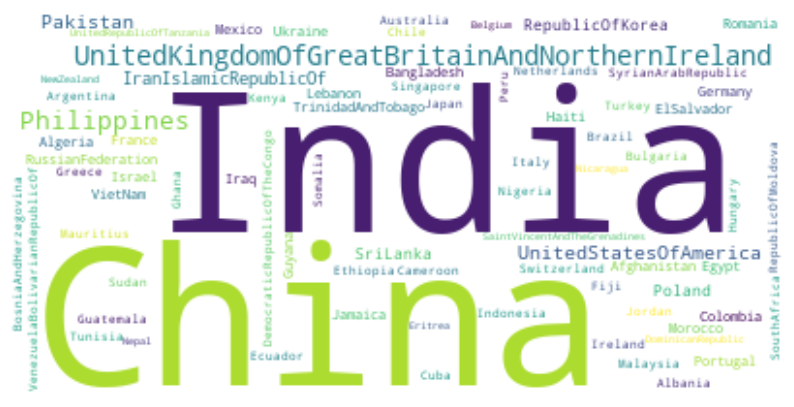

In [79]:
wc_can = WordCloud(background_color='white',
                   collocations=False).generate(word_string)

# plot
plt.figure(figsize=(10, 6))
plt.imshow(wc_can, interpolation='bilinear')
plt.axis('off')
plt.show()

## Masking dengan peta canada

In [80]:
!wget --quiet https://raw.githubusercontent.com/stefkwan-h8/dataset/698260b1725f1ca2ee3e4bfd41394e0919a7ef96/canada_mask.png -O canada_mask.png

In [88]:
canada_mask = Image.open('canada_mask.png').convert('RGBA')
white_bg = Image.new('RGBA', canada_mask.size, 'WHITE')
canada_mask = Image.alpha_composite(white_bg, canada_mask)
canada_mask = canada_mask.convert('L')
canada_mask = np.array(canada_mask)

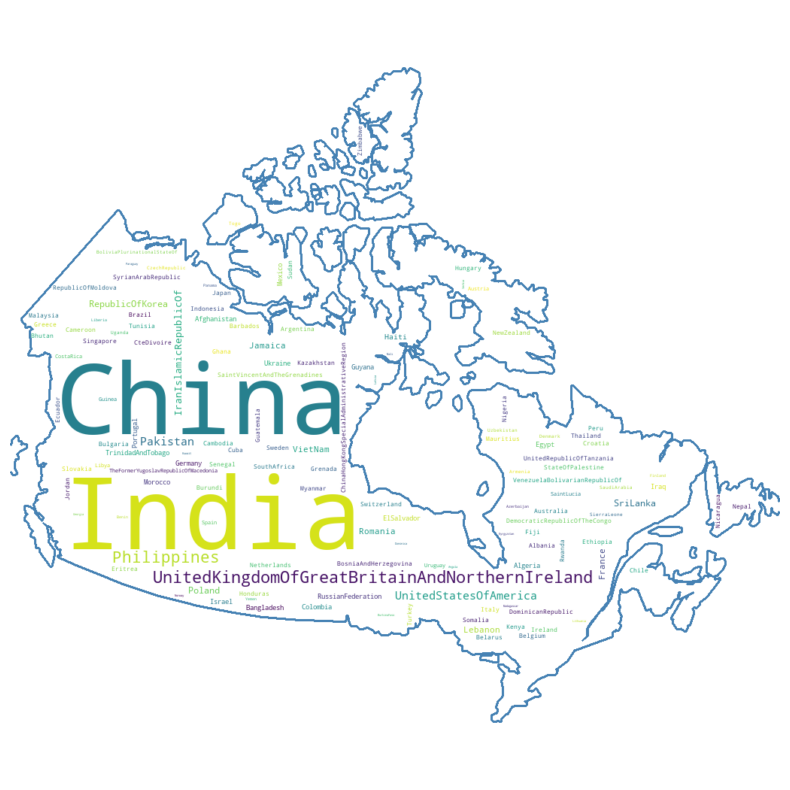

In [92]:
wc_can = WordCloud(background_color='white',
                   collocations=False,
                   mask=canada_mask,
                   contour_color='steelblue',
                   contour_width= 3).generate(word_string)

# plot
plt.figure(figsize=(10, 10))
plt.imshow(wc_can, interpolation='bilinear')
plt.axis('off')
plt.show()

# Regression Plot

In [93]:
df_total = data[tahun].sum(axis=0)
df_total = pd.DataFrame(df_total)

df_total = df_total.reset_index()
df_total.columns = ['year', 'total']

df_total.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


<Axes: xlabel='year', ylabel='total'>

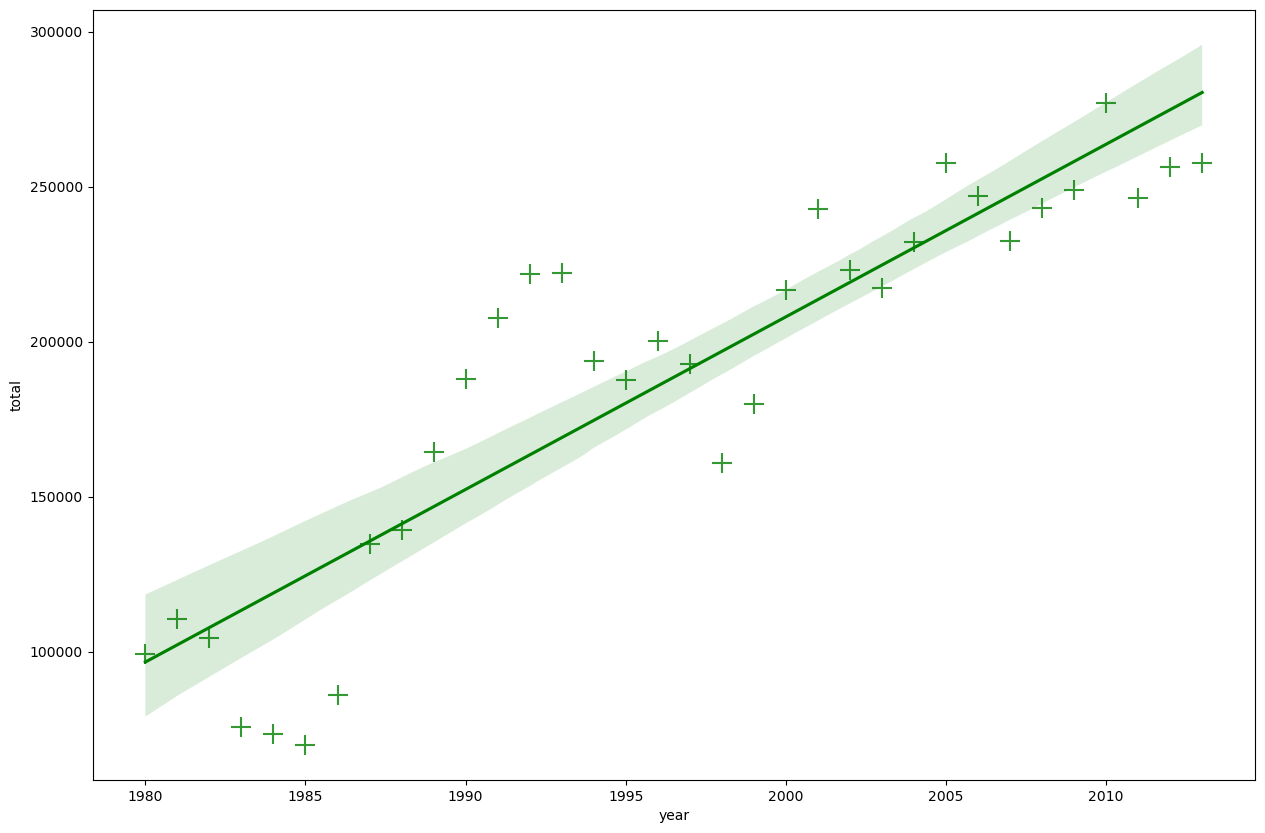

In [103]:
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.regplot(x='year', y='total', data=df_total, color='green', marker='+',
            scatter_kws={'s': 200})

## Denmark Norway Sweden

In [106]:
dns_total = pd.DataFrame(dns.sum(axis=1), columns=['total']).reset_index()
dns_total.columns = ['year', 'total']
dns_total.head()

,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


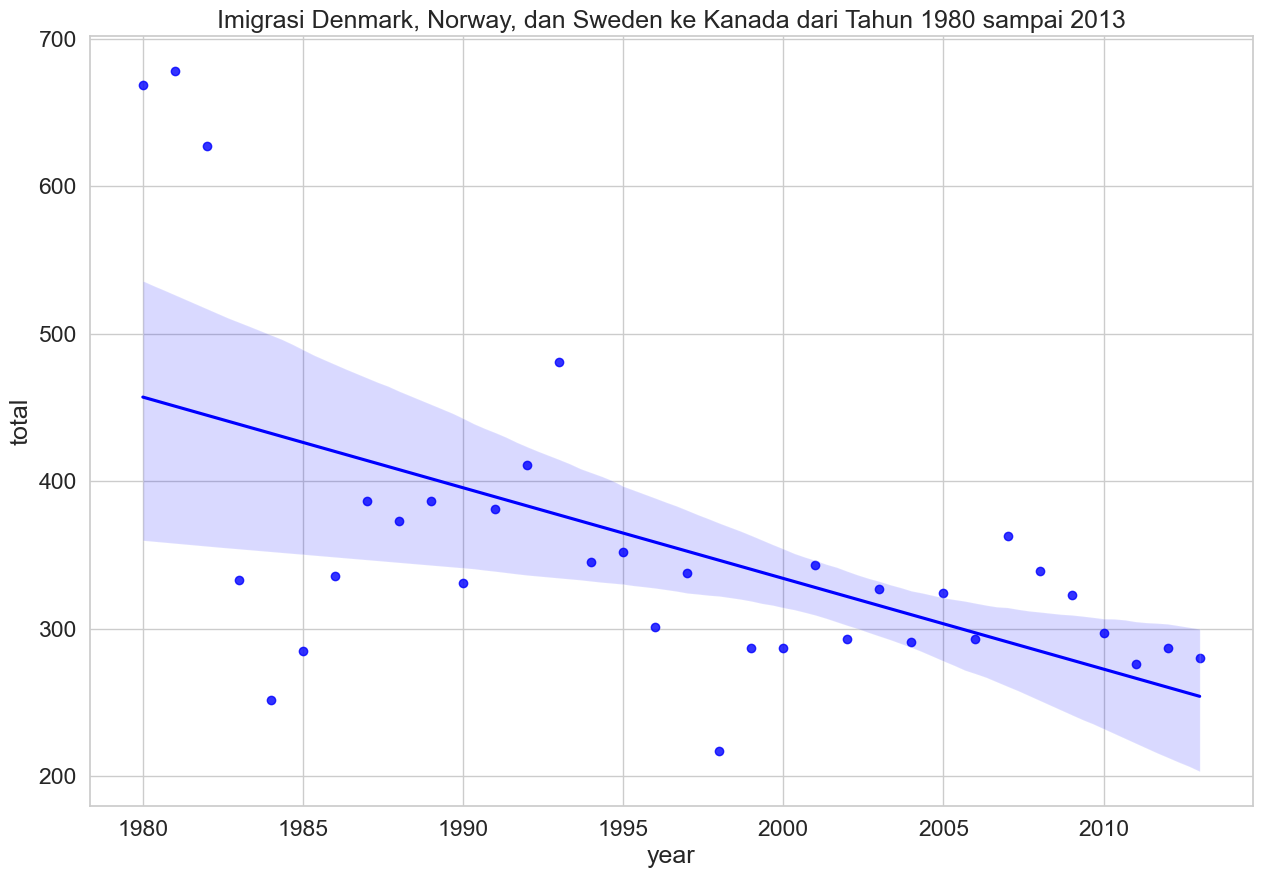

In [120]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=dns_total, color='blue', marker='o')
ax.set_title('Imigrasi Denmark, Norway, dan Sweden ke Kanada dari Tahun 1980 sampai 2013')
sns.set(font_scale=1.5)
sns.set_style('whitegrid')

# Choropleth Map

In [121]:
import folium

In [122]:
data_country = data.reset_index()
data_country

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
191,Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
192,Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,...,161,140,122,133,128,211,160,174,217,2985
193,Zambia,Africa,Eastern Africa,Developing regions,11,17,11,7,16,9,...,91,77,71,64,60,102,69,46,59,1677


In [123]:
# get geojson file
!wget --quiet https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/world_countries.json -O world_countries.json

In [125]:
world_geo = r'world_countries.json'

'world_countries.json'

In [128]:
world_map = folium.Map(
   location=[0,0],
   zoom_start=2,
)

folium.Choropleth(
    geo_data=world_geo,
    data=data_country,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', #Yellow, Orange, Red
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Immigration to Canada'
).add_to(world_map)

world_map

In [129]:
akses_token= "pk.eyJ1Ijoic3RlZmt3YW4iLCJhIjoiY20xY3hybGpiMmRtZDJsc2o0dWt4d3l4aiJ9.vNIHGxgkSzrg-_ZgwDzCvQ"
# menggunakan tileset yang tidak ada akan membuat Map kosong
tileset_id= "hacktiv8.notileset"
mapbox_link= "https://api.mapbox.com/v4/"+tileset_id+"/{z}/{x}/{y}{@2x}.png"
tiles_link= mapbox_link + "?access_token=" + akses_token

world_map = folium.Map(
   location=[0,0],
   zoom_start=2,
   tiles=tiles_link,
   attr=tileset_id
)

folium.Choropleth(
    geo_data=world_geo,
    data=data_country,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', #Yellow, Orange, Red
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Immigration to Canada'
).add_to(world_map)

world_map